$13^{th}$ Aug 2021

In [1]:
import pandas as pd
import os, glob, math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ipywidgets import widgets, interactive

In [2]:
dt = datetime.today().strftime(format='%d-%m-%Y')

### **Establish parent directory**

In [3]:
#uniqueness in directory and file names is assumed for all analyses
sars_dir = 'SARS-CoV-2'
run_dir = 'KnowledgeBrief'
home_dir = os.getenv('HOME')
parent_dir = glob.glob(f'{home_dir}/**/{sars_dir}', recursive=True)[0]

In [4]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    elif x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    elif x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    elif x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    elif x == 'AY.4':
        return x.replace(x, 'AY.4(Delta)')
    elif x == 'AY.12':
        return x.replace(x, 'AY.12(Delta)')
    return x
    

In [5]:
df_seq_summ1 = pd.read_excel(glob.glob(f'{parent_dir}/**/metadata-seq-MS-ILL-ONT_19-09-2021.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [6]:
df_seq_summ = df_seq_summ1[df_seq_summ1['G_COV'] >= 70.0]

In [7]:
df_seq_summ.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10
1,COVC03617,55.0,F,None indicated,Kenya,Nairobi,No,NaN,DSH,None,...,NaN,NaN,NaN,NaN,NaN,NaN,R195K,NaN,NaN,NaN
2,COVC03665,23.0,M,None indicated,Kenya,Nairobi,No,NaN,DSH,None,...,NaN,NaN,NaN,NaN,NaN,NaN,R195K,NaN,NaN,NaN
3,COVC03696,24.0,M,None indicated,Kenya,Nairobi,No,NaN,DSH,None,...,NaN,NaN,W27L,NaN,NaN,F3S,R195K,NaN,NaN,NaN
4,COVC03723,36.0,M,None indicated,Kenya,Nairobi,No,NaN,DSH,None,...,NaN,G147G,NaN,NaN,NaN,F3S,R195K,NaN,NaN,NaN
5,COVC03813,59.0,M,NaN,Kenya,Nairobi,No,NaN,Hemingways,No,...,NaN,NaN,NaN,NaN,NaN,NaN,"R195K, H300Y",NaN,NaN,NaN


In [8]:
df_seq_summ.shape

(887, 35)

In [9]:
voc_list = ['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'A23.1', 'B.1.525']

In [10]:
df_seq_summ['LIN'].unique()

array(['B.1', 'B.1.119', 'B.1.336', 'B.1.527', 'B.1.1', 'B.1.276',
       'B.1.549', 'A.25', 'B.1.509', 'B.1.390', 'A.23', 'B.1.214',
       'B.1.530', 'B.1.446', 'A.23.1', 'B.1.1.519', 'B.1.596.1',
       'B.1.393', 'B.1.1.1', 'B.1.540', 'B.1.524', 'B.1.405', 'B.1.1.7',
       'B.1.153', 'B.1.391', 'B.1.343', 'B.1.433', nan, 'B.1.143', 'A',
       'B.1.612', 'B.1.577', 'B.1.605', 'B.1.351', 'B.1.525', 'B.1.1.318',
       'AY.4', 'AY.12', 'B.1.617.2', 'A.2.3', 'B.1.103', 'B.1.302',
       'B.1.333', 'B.1.535', 'B.1.160', 'B.1.378', 'B.1.596', 'B.1.551',
       'B.1.324', 'B.1.520', 'B.1.574'], dtype=object)

In [11]:
df_voc = df_seq_summ[df_seq_summ['LIN'].isin(voc_list)]

In [12]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    elif x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    elif x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    elif x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    elif x == 'AY.4':
        return x.replace(x, 'AY.4(Delta)')
    elif x == 'AY.12':
        return x.replace(x, 'AY.12(Delta)')
    return x
    

In [13]:
df_voc_grp_lin = df_voc.groupby('LIN', dropna=False)['S_NUM'].count()

In [14]:
fontdict = {'fontsize': 12,
        'fontweight': 'normal',
        'color': 'k',
        'horizontalalignment': 'center'}

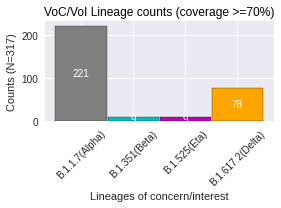

In [151]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(4,3))
y = df_voc_grp_lin
yy = map(replace_with_who_lin, list(y.index))
y.index = yy

n = sum(y)
g = plt.bar(y.index, y, color=['gray', 'c', 'm', 'orange'], width=0.99, ec='k')
ax.bar_label(g, label_type='center', labels=list(y), color='w', fontsize=10)
plt.ylabel(f'Counts (N={n})')
plt.xlabel('Lineages of concern/interest')
# plt.grid('major', axis='y', ls='-.')
plt.title('VoC/VoI Lineage counts (coverage >=70%)', fontdict)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-VoI-VoC_{dt}.svg")
plt.show()
#doesn't seem like a good plot, consider pie chart

<AxesSubplot:xlabel='S_NUM', ylabel='Count'>

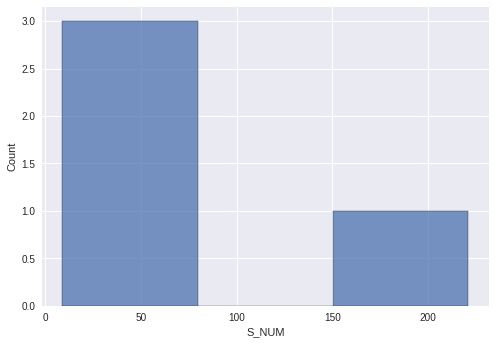

In [149]:
sns.histplot(y)

In [16]:
def assign_seq_platform(x):
    x = str(x)
    if 'ONT' in x: 
        return x.replace(x, 'ONT')
    elif '_NS' in x:
        return x.replace(x, 'NextSeq')
    return x.replace(x, 'MiSeq')

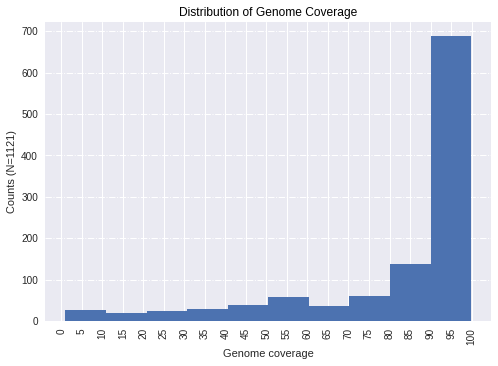

In [17]:
fig,ax = plt.subplots(1,1)
plt.hist(df_seq_summ1['G_COV'])
plt.xlabel('Genome coverage')
plt.ylabel(f'Counts (N={df_seq_summ1.shape[0]-1})')
plt.xticks(np.arange(0,105, 5), rotation=90)
# plt.yticks(np.arange(0,375, 25))
plt.grid('major', axis='y', ls='-.')
plt.title('Distribution of Genome Coverage', fontdict)
# ax.hlines(67, 2, 99, colors='orange', linestyles='--')
# plt.annotate('80% coverage threshold', xy=(30, 80))
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-coverage_{dt}.png')
plt.show()



In [18]:
df_seq_summ1[df_seq_summ1['S_NUM'].str.contains('_')]

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,...,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10
787,KEMRI_01_89431,44.0,M,NaN,Kenya,Kirinyaga,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,KEMRI_01_89447,28.0,F,NaN,Kenya,Kirinyaga,No,NaN,NaN,NaN,...,NaN,L67F,NaN,NaN,NaN,V62L,"P13S, R195K, P207T",NaN,NaN,N25N
789,KEMRI_01_89476,41.0,M,NaN,Kenya,Nairobi,No,NaN,NaN,"sore throat,cough,headache,fever",...,NaN,T9T,NaN,NaN,NaN,F120F,"T205I, L400L",NaN,NaN,NaN
790,KEMRI_01_89487,57.0,M,NaN,Kenya,Kiambu,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"L84S, E92K","A35A, S202N",NaN,NaN,NaN
791,KEMRI_01_89581,53.0,F,NaN,Kenya,Kajiado,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Q27*, R52I, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,KEMRI_02_93806,31.0,F,NaN,Kenya,Kiambu,No,NaN,NaN,"General weakness, Cough, Diarrhoea",...,NaN,NaN,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F",NaN,NaN,NaN
1095,DRC-BKV-15_A,41.0,M,NaN,Democratic Republic of the Congo,Bukavu,No,NaN,NaN,CO;RN;LT;GW,...,NaN,I82T,NaN,"V82A, T120I",NaN,D119_F120del,"D63G, R203M, G215C, D377Y",NaN,NaN,NaN
1096,DRC-BKV-15_B,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,No,NaN,NaN,NaN,...,NaN,NaN,NaN,"V82A, T120I",NaN,D119_F120del,"R203M, G215C, D377Y",NaN,NaN,NaN
1101,DRC-BKV-20_A,54.0,M,NaN,Democratic Republic of the Congo,Bukavu,No,NaN,NaN,CO;RN;LT;GW;P-A,...,NaN,I82T,NaN,"V82A, T120I",NaN,D119_F120del,"D63G, R203M, G215C, D377Y",NaN,NaN,NaN


In [19]:
df_seq_summ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 1 to 1121
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   S_NUM         887 non-null    object        
 1   AGE_YRS       846 non-null    float64       
 2   GEND          863 non-null    object        
 3   OCCU          500 non-null    object        
 4   NAT           887 non-null    object        
 5   COUNT_RES     887 non-null    object        
 6   TRAV_HIST     887 non-null    object        
 7   TRAV_FROM     20 non-null     object        
 8   QUAR_PLACE    42 non-null     object        
 9   SYMPS         344 non-null    object        
 10  DT_SAM_COLL   779 non-null    datetime64[ns]
 11  DT_SAM_RECEP  703 non-null    datetime64[ns]
 12  RESULT        887 non-null    object        
 13  DT_CONF       870 non-null    datetime64[ns]
 14  AVG_Ct        654 non-null    float64       
 15  LIN           883 non-null    object   

In [20]:
df_gby_lin = df_seq_summ.groupby('LIN').count()#, as_index=False

In [21]:
clr_code = {'A':('midnightblue','#191970'),
'A.23':('lime','#00FF00'),
'A.23.1':('gray','#808080'),
'A.25':('orangered','#FF4500'),
'AY.4':('mediumvioletred','#C71585'),
'AY.12':('saddlebrown','#8B4513'),
'B.1':('cyan','#00FFFF'),
'B.1.1':('chocolate','#D2691E'),
'B.1.1.1':('wheat','#F5DEB3'),
'B.1.1.171':('teal','#008080'),
'B.1.1.406':('slategray','#708090'),
'B.1.1.7':('orange','#FFA500'),
'B.1.103':('seagreen','#2E8B57'),
'B.1.143':('olive','#808000'),
'B.1.153':('taffy','#F96DDA'),
'B.1.160':('honeydew','#FFD700'),
'B.1.214':('gold','#8FBC8F'),
'B.1.276':('aquamarine','#006400'),
'B.1.302':('yellowgreen','#9ACD32'),
'B.1.1.318':('slategray','#708090'),
'B.1.336':('tan','#D2B48C'),
'B.1.343':('indigo','#4B0082'),
'B.1.349':('mediumpurple','#9370DB'),
'B.1.351':('blue','#0000FF'),
'B.1.378':('darkslateblue','#483D8B'),
'B.1.388':('sienna','#A0522D'),
'B.1.390':('darkkhaki','#BDB76B'),
'B.1.393':('sapphire','#0F52BA'),
'B.1.405':('royal','#7852A9'),
'B.1.429':('khaki','#F0E68C'),
'B.1.433':('dodgerblue','#1E90FF'),
'B.1.446':('palevioletred','#DB7093'),
'B.1.517':('yellow','#FFFF00'),
'B.1.520':('cornflowerblue','#6495ED'),
'B.1.524':('pink','#FFC0CB'),
'B.1.525':('green','#008000'),
'B.1.527':('maya','#73C2FB'),
'B.1.530':('red','#AFEEEE'),
'B.1.535':('purple','#800080'),
'B.1.540':('slategray','#AF69EE'),
'B.1.549':('brown','#A52A2A'),
'B.1.551':('chocolate','#D2691E'),
'B.1.577':('silver','#C0C0C0'),
'B.1.596':('steelblue','#4682B4'),
'B.1.596.1':('magenta','#FF00FF'),
'B.1.605':('rosybrown','#BC8F8F'),
'B.1.612':('goldenrod','#DAA520'),
'B.1.617.2':('paleturquoise','#FF0000'),
'B.1.509':('lavender','#E6E6FA'),
'B.1.509':('seashell','#FFFAF0'),
'B.1.1.519':('black','#000000'),
'A.2.3':('cornflowerblue','#FFF5EE'),
'B.1.333':('darkgreen','#7FFFD4'),
'B.1.391':('darkseagreen','#F0FFF0'),
'B.1.119': ('cyan', 'c'),
'B.1.324': ('magenta', 'm'),
'B.1.574': ('black', 'k')}
avail_clr = ['TBA8', 'c', 'm', 'k']

In [22]:
clr_code_keys = list(clr_code.keys())

In [23]:
lins = df_gby_lin.S_NUM.sort_values(ascending=False)#.index
# lins

In [24]:
lin_to_be_assinged =  set(lins.index) - set(clr_code_keys)
# lin_to_be_assinged

In [25]:
import pprint
for lin, clr in zip(lin_to_be_assinged, avail_clr):
#     print(lin, clr)
    clr_code[lin] = clr_code.pop(clr)
    avail_clr.remove(clr)

In [26]:
# pprint.pprint(clr_code)
pprint.pprint(avail_clr)

['TBA8', 'c', 'm', 'k']


In [27]:
ylabels = list(map(replace_with_who_lin,list(lins.index)))

In [28]:
lins.index=ylabels

In [29]:
lins.values.sum()

883

In [30]:
max_count = lins.max()
max_count

319

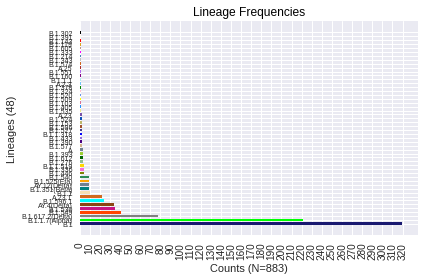

In [31]:
plt.style.use('seaborn')
width = lins.sort_values(ascending=False)

# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
colors = [clr_code[lin][1] for lin in clr_code.keys()]
n = len(lins) - 2
m = sum(lins)
xticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 10)
fig, ax =plt.subplots(1, 1, figsize=(6,4))
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, log=False, color=colors)#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
# plt.grid(which='major', axis='x', ls='--', color='w')
plt.ylabel(f'Lineages ({n})')
plt.xlabel(f'Counts (N={m})')
plt.title('Lineage Frequencies', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-lineages_{dt}600.png', dpi=600.0)
plt.show()

In [32]:
df_1 = df_seq_summ[df_seq_summ['S_NUM'].str.contains('COV') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [33]:
df_2 = df_seq_summ[df_seq_summ['S_NUM'].str.contains('COVC') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [34]:
set(df_2['S_NUM']) - set(df_1['S_NUM'])

{'MOH-COV-4', 'MOH-COV-5', 'MOH-COV-6'}

In [35]:
df_metadata = pd.read_excel(glob.glob(f'{parent_dir}/**/Outputs/COVID19-resultsCts-merged-cln.xlsx', recursive=True)[0])#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [36]:
df_covs = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == True]#.shape

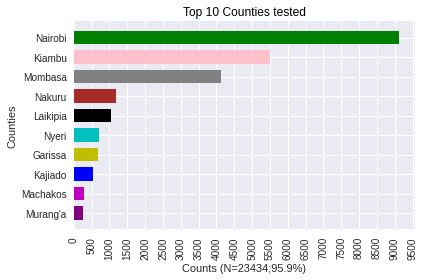

In [37]:
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

max_count = max(width)
# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
# n = len(lins) - 2
m = sum(width)
n = df_covs.shape[0]
xticks = np.arange(0, (math.ceil(max_count / 500) + 1) * 500, 500)
fig, ax =plt.subplots(figsize=(6,4))
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, color=['purple', 'm', 'b',
                                                'y', 'c', 'k',
                                                'brown', 'gray',
                                               'pink', 'g'])#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
# plt.grid(which='major', axis='x', ls='--', color='lightgray')
plt.ylabel('Counties')
plt.yticks(fontsize=10)
plt.xlabel(f'Counts (N={m};{round(m/n*100, 1)}%)')
plt.title('Top 10 Counties tested', fontdict)
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-top10tested_{dt}.png")
plt.show()

In [38]:
df_seq_summ.columns

Index(['S_NUM', 'AGE_YRS', 'GEND', 'OCCU', 'NAT', 'COUNT_RES', 'TRAV_HIST',
       'TRAV_FROM', 'QUAR_PLACE', 'SYMPS', 'DT_SAM_COLL', 'DT_SAM_RECEP',
       'RESULT', 'DT_CONF', 'AVG_Ct', 'LIN', 'SCORP_CALL', 'CLADE', 'G_COV',
       'N_VAR', 'S', 'ORF1ab', 'ORF1a', 'ORF3a', 'ORF3b', 'E', 'M', 'ORF6',
       'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF9a', 'ORF9b', 'ORF10'],
      dtype='object')

In [39]:
pie_clr = {v[1]: k for k,v in clr_code.items()}

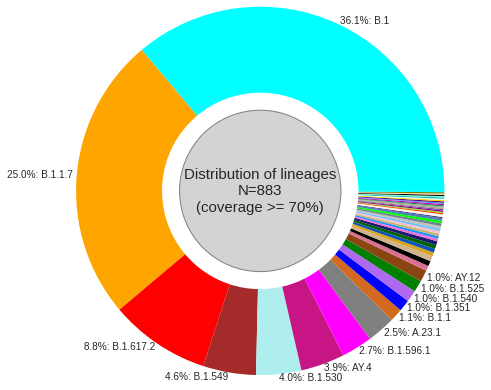

In [50]:
fig,ax = plt.subplots()

data = df_seq_summ['LIN'].value_counts()
pie_clr = {clr_code[k][1]: k for k in data.index}
pct = (np.array(data)/np.array(data).sum()*100).round(1)
labels = {}
for k,v in zip(data.index, pct):
    if v >= 1:
        labels[k] = f'{v}%: {k}'
    else:
        labels[k] = ''
plt.pie(data, wedgeprops=dict(width=0.7), labels=list(labels.values()), labeldistance=1.02, radius=1.5, 
       colors=pie_clr)
t = ax.text(
    0, 0, f'Distribution of lineages\nN={data.sum()}\n(coverage >= 70%)', ha="center", va="center", size=15,
    bbox=dict(boxstyle="circle,pad=0.3", fc="lightgray", ec="gray", lw=1))
# ax.annotate(f'Distribution of lineages\nN={data.sum()}\n(coverage >= 70%)', (0,0), fontsize=14)
# ax.set_title('Proportions for Test Outcome', fontdict, pad=1.1)
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linfreq-pie_{dt}.png")
plt.show()

In [51]:
top10lins = df_seq_summ['LIN'].value_counts().index[:10].tolist()#.head()
top10lins

['B.1',
 'B.1.1.7',
 'B.1.617.2',
 'B.1.549',
 'B.1.530',
 'AY.4',
 'B.1.596.1',
 'A.23.1',
 'B.1.1',
 'B.1.351']

In [109]:
df = df_seq_summ[df_seq_summ['DT_CONF'].notna()]
df.shape
df[df['LIN'].isin(top10lins)].shape

(776, 35)

In [110]:
df_timeidx = df_seq_summ[df_seq_summ['DT_CONF'].notna()]
df_timeidx.shape
df_timeidx[df_timeidx['LIN'].isin(top10lins)].shape

(776, 35)

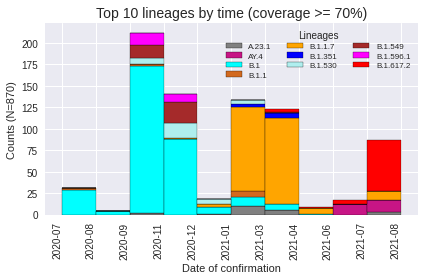

In [52]:
plt.style.use('seaborn')
# Prepare data
df = df_seq_summ[df_seq_summ['DT_CONF'].notna()]

x_var = 'DT_CONF'
groupby_var = 'LIN'
df_agg = df[df['LIN'].isin(top10lins)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

colors = {i: clr_code[i][1] for i, df in df_agg}
# Draw
plt.figure(figsize=(6,4))
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True, density=False, color=colors.values(), ec='k')

# Decoration
plt.legend(colors, title='Lineages', fancybox=True, labelspacing=0.25, ncol=3, fontsize=8)#, ncol=3
plt.title(f"Top 10 lineages by time (coverage >= 70%)", fontsize=14)
plt.xlabel('Date of confirmation')
plt.ylabel(f"Counts (N={df.shape[0]})")
# plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=pd.to_datetime(bins).strftime('%Y-%m'), rotation=90, horizontalalignment='right')
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXtime_{dt}.png")
plt.show()

In [53]:
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

In [54]:
top10counties = df_seq_summ.COUNT_RES.value_counts()[:11].index.tolist()
top10counties

['Kiambu',
 'Nairobi',
 'Mombasa',
 'Nakuru',
 'Siaya',
 'Homabay',
 'Meru',
 'Laikipia',
 'Unknown',
 'Bukavu',
 'Kajiado']

In [55]:
df1 = df_seq_summ[df_seq_summ.COUNT_RES.isin(top10counties)]

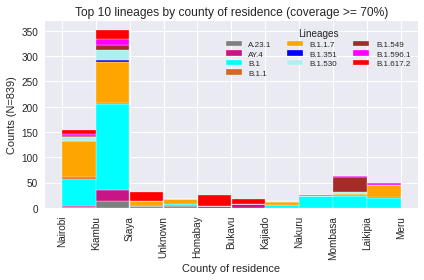

In [56]:
plt.style.use('seaborn')
# Prepare data
df = df1#df_seq_summ[df_seq_summ['COUNT_RES'].notna()]

x_var = 'COUNT_RES'
groupby_var = 'LIN'
df_agg = df[df['LIN'].isin(top10lins)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

colors = {i: clr_code[i][1] for i, df in df_agg}
# Draw
plt.figure(figsize=(6,4))
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True,
                            density=False, color=colors.values(), ec='w', rwidth=0.99)

# Decoration
plt.legend(colors, title='Lineages', fancybox=True, labelspacing=0.25, ncol=3, fontsize=8)#, ncol=3
plt.title(f"Top 10 lineages by county of residence (coverage >= 70%)", fontsize=12)
plt.xlabel('County of residence')
plt.ylabel(f"Counts (N={df.shape[0]})")
# plt.ylim(0, 40)
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXtime_{dt}.png")
plt.show()

In [57]:
vals.sort(key=len)

In [59]:
df2 = df1[df1.LIN.isin(top10lins)]

In [60]:
row_order = df2.groupby('COUNT_RES').count().S_NUM.sort_values(ascending=False)
row_order

COUNT_RES
Kiambu      351
Nairobi     154
Mombasa      63
Siaya        32
Homabay      26
Meru         26
Nakuru       25
Laikipia     23
Unknown      18
Bukavu       17
Kajiado      14
Name: S_NUM, dtype: int64

In [61]:
df3 = df2.assign(COUNT_RES = pd.Categorical(df2.COUNT_RES, categories=row_order.index,ordered=True))

In [62]:
sr_top10lin = df_seq_summ['LIN'].value_counts()[:10]
top10lin_rev = sr_top10lin.sort_values(ascending=True).index

<function matplotlib.pyplot.show(close=None, block=None)>

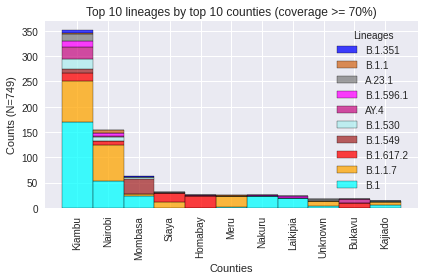

In [65]:
df = df3.rename(columns={'LIN':'Lineages'}).sort_values('COUNT_RES', ascending=False)
plt.figure(figsize=(6,4))
sns.set_palette(sns.color_palette(colors.values()))
# sns.set_color_codes('pastel')
sns.histplot(df, x='COUNT_RES', 
            hue='Lineages',multiple="stack",
             hue_order=top10lin_rev,
#             stat='percent',
#             col_order=row_order,
           palette=colors, legend=True)#legend=True, loc='upper right',title='Lineages', ncol=1, borderaxespad=0
# ax.get_legend()
plt.xticks(rotation=90)
plt.ylabel(f'Counts (N={row_order.sum()})')
plt.xlabel('Counties')
# plt.legend(df.LIN.value_counts().sort_values(ascending=True)[-10:].index,
#           title='Lineages', ncol=1)#, bbox_to_anchor=(1,1)
plt.title('Top 10 lineages by top 10 counties (coverage >= 70%)', fontsize=12)
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linXcounty_{dt}.png")
plt.show

In [111]:
df_time10 = df_seq_summ[df_seq_summ['DT_CONF'].notna()]#.set_index('DT_CONF').sort_index()

In [116]:
df_timeidx = df_time10[df_time10['LIN'].isin(top10lins)].set_index('DT_CONF').sort_index()

In [117]:
df_timeidx.shape#.head()#to_excel('/home/douso/see.xlsx')#.

(776, 34)

In [118]:
df_ts = df_timeidx[df_timeidx['LIN'].notna()]
df_ts.shape

(776, 34)

In [119]:
df_ts2 = df_ts[df_ts['LIN'].isin(top10lins)]
df_ts2.shape

(776, 34)

In [121]:
df_ts3 = df_ts2.assign(LIN = pd.Categorical(df_ts2.LIN, categories=top10lins,ordered=True))

In [122]:
monthly = df_ts3.resample('W', closed='right')#['lineage'].value_counts()

In [123]:
x = monthly['LIN'].value_counts()#.to_frame()#.T#.plot.hist(stacked=True)

In [124]:
x_index = list(x.index)
x_counts = list(x)

In [125]:
dict_={}
for idx,lin in zip(x_index, x_counts):
    if idx[0] in dict_:
        dict_[idx[0]][idx[1]] = lin
    else:
        dict_[idx[0]] = {}
        dict_[idx[0]][idx[1]] = lin

In [126]:
dt_lin_ts = pd.DataFrame(columns=set(x.index.get_level_values(1)))
data = {l: 0 for l in set(x.index.get_level_values(1))}
idx = []
for k,v in dict_.items():
    data.update(v)
    dt_lin_ts = dt_lin_ts.append(data, ignore_index=True)
    idx.append(k)#.strftime('%Y-%m-%d'))
dt_lin_ts.index=idx
# dt_lin_ts

In [127]:
# plt.style.available
lin_colors = {k: clr_code[k][1] for k,v in clr_code.items()}

In [128]:
dt_lin_ts1 = dt_lin_ts[top10lins.tolist()]

In [129]:
dt_lin_ts1.head()

,B.1,B.1.1.7,B.1.617.2,B.1.549,B.1.530,AY.4,B.1.596.1,A.23.1,B.1.1,B.1.525
2020-07-12,3,0,0,0,0,0,0,0,0,0
2020-07-19,10,0,0,0,0,0,0,0,0,0
2020-07-26,3,0,0,0,0,0,0,0,1,0
2020-08-09,9,0,0,0,0,0,0,0,1,0
2020-08-16,4,0,0,0,0,0,0,0,1,0


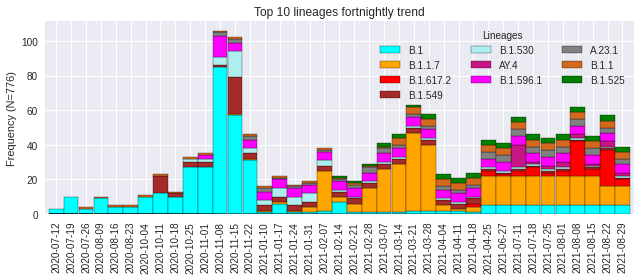

In [146]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
# plt.style.use('ggplot')
xticks = list(map(lambda x: pd.Timestamp(x), list(dt_lin_ts.index)))
xlabels = list(map(lambda x: x.strftime('%Y-%m-%d'), list(dt_lin_ts.index)))
fig,ax = plt.subplots(figsize=(9,4))
dt_lin_ts1.plot.bar(stacked=True, ax=ax, color=lin_colors, ec='k', width=0.99)
ax.set_xticklabels(xlabels)
plt.xticks()
plt.ylabel(f"Frequency (N={df_ts2.shape[0]})")
plt.legend(title='Lineages', bbox_to_anchor=(1, 1), fancybox=True, ncol=3, loc=1)#bbox_to_anchor = (1, 1), 
plt.title('Top 10 lineages fortnightly trend')
plt.tight_layout()
plt.savefig(f"{glob.glob(f'{parent_dir}/**/PlotsFigures', recursive=True)[0]}/report-linX2weeks_{dt}.svg")
plt.show()

In [131]:
import numpy as np
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive


topX = list(top10lins) + ['All']
lineage = widgets.Dropdown(options=topX, value='All', description='Lineages:')
interp_points = widgets.IntSlider(value=500, min=100, max=2100, step=500, description='Number of data points:')
 
def graph1(lineage, interp_points):
    # Dataset
    df = dt_lin_ts
    n = df.shape[0]
    
    #Get x boundaries
    start = pd.Timestamp(df.index[0])
    end = pd.Timestamp(df.index[-1])
    
    #X-locators
    dt_rng = pd.date_range(start, end, periods=n, normalize=True)
    xticks = [pd.Timestamp(dt).value for dt in dt_rng]#dt_lin_ts.index
    xlabel = [dt.strftime('%Y-%m') for dt in dt_rng]#dt_lin_ts.index
    
    #Plot canvas
    fig,ax = plt.subplots(figsize=(6,4))
    
    if lineage == 'All':
        lins = df.columns
    else:
        lins = []; lins.append(lineage)
    for lin in lins:
#         df += 1
        y=df[lin]
        x_interp = np.linspace(start.value, end.value, len(y))
    
        #Train model
#         cubic_interploation_model = interp1d(x_interp, y, kind = "cubic")
        bspline_interp = make_interp_spline(x_interp, y, k=3)
 
        # Plotting the Graph
        X_=np.linspace(x_interp.min(), x_interp.max(), interp_points)
#         Y_=cubic_interploation_model(X_)
        Y_=bspline_interp(X_)

        ax.plot(X_, Y_, label=lin, color=lin_colors[lin])
        ax.legend()
    plt.title('Lineages count over time')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
    plt.xticks(xticks, labels=xlabel, rotation=90)
    plt.xlabel("Months (fortnightly)")
    plt.ylabel("Counts")
    plt.show()

In [132]:
interactive(graph1, lineage=lineage, interp_points=interp_points)

interactive(children=(Dropdown(description='Lineages:', index=10, options=('B.1', 'B.1.1.7', 'B.1.617.2', 'B.1…

In [133]:
from ipywidgets import widgets, interactive

In [134]:
index = df_ts['LIN'].resample('M', closed='right').count().index

In [135]:
ticks = [dt.value for dt in index]

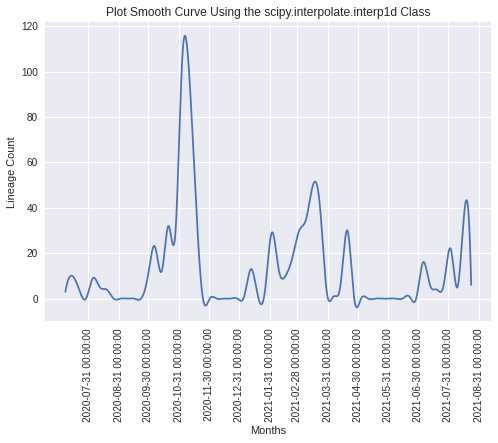

In [136]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
n=df_ts.shape[0]
x=np.arange(n)
y=np.array(df_ts['LIN'].resample('W', closed='right').count())

start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

t = np.linspace(start.value, end.value, len(y))

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots()

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
plt.xticks(ticks, labels=index, rotation=90)
plt.xlabel("Months")
plt.ylabel("Lineage Count")
plt.show()

In [137]:
start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

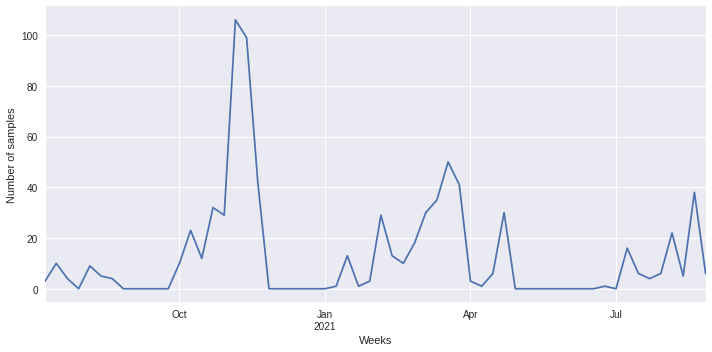

In [138]:
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots(figsize=(10, 5))

tests = df_ts['LIN'].resample('W').count()
# pos = df_tseries0['RESULT'].resample('W').count()
# neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, linestyle='-', label='tests')
# neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
# pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line_{dt}.png')
plt.show()